<a href="https://colab.research.google.com/github/AhmedAtefGaber/Speaker-Identification/blob/master/spk_id_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pydub

In [0]:
!pip install tensorflow==2.0.0alpha

     |████████████████████████████████| 79.9MB 291kB/s 
     |████████████████████████████████| 3.0MB 32.7MB/s 
     |████████████████████████████████| 419kB 37.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import IPython
import numpy as np
import glob as glob 
from scipy.io import wavfile
import os
import random
from scipy.io import wavfile
from sklearn.utils import shuffle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_raw_audio():
    spk_1=[]
    spk_2=[]
    for filename in os.listdir("/content/drive/My Drive/spk_id/train/spk_1"):
        if filename.endswith("wav"):
            spk = "/content/drive/My Drive/spk_id/train/spk_1/"+filename
            spk_1.append(spk)
    for filename in os.listdir("/content/drive/My Drive/spk_id/train/spk_2"):
        if filename.endswith("wav"):
            spk = "/content/drive/My Drive/spk_id/train/spk_2/"+filename
            spk_2.append(spk)
    
    return spk_1,spk_2

In [0]:
spk_1, spk_2 = load_raw_audio()

In [0]:
x_audio=spk_1+spk_2
y=[0]*len(spk_1)+[1]*len(spk_2)

In [0]:
x_audio,y=shuffle(x_audio,y)

In [0]:
IPython.display.Audio(x_audio[550])

In [0]:
max_len=110000
x = np.zeros((1099,max_len))
for i in range(1099):
  _,data=wavfile.read(x_audio[i])
  data=np.pad(data,(0,max_len-len(data)), 'constant', constant_values=0)
  x[i,:]=data


In [0]:
y=np.array(y)

In [0]:
model = tf.keras.Sequential([
                            #tf.keras.layers.LSTM(50,input_shape=(max_len, 1),return_sequences=True),
                            tf.keras.layers.Dense(512),
                            tf.keras.layers.Activation('relu'),
                            tf.keras.layers.Dense(128),
                            tf.keras.layers.Activation('relu'), 
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Activation('sigmoid')
                            ])
#model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x,y, epochs=5,verbose=1)

Epoch 1/5
1099/1099 [==============================] - 2s 2ms/sample - loss: 2984.8711 - acc: 0.5641
Epoch 2/5
1099/1099 [==============================] - 2s 2ms/sample - loss: 892.4308 - acc: 0.8335
Epoch 3/5
1099/1099 [==============================] - 2s 1ms/sample - loss: 220.8681 - acc: 0.9436
Epoch 4/5
1099/1099 [==============================] - 2s 1ms/sample - loss: 73.0956 - acc: 0.9663
Epoch 5/5
1099/1099 [==============================] - 2s 1ms/sample - loss: 34.1679 - acc: 0.9854


<Figure size 432x288 with 0 Axes>

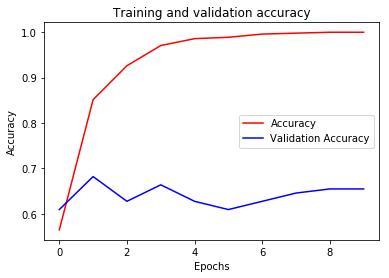

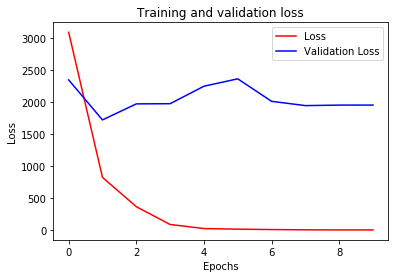

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

In [0]:
spk_1_test, spk_2_test = load_raw_audio_test()

In [0]:
x_audio_test=spk_1_test+spk_2_test
y_test=[0]*len(spk_1_test)+[1]*len(spk_2_test)

In [0]:
max_len=110000
x_test = np.zeros((20,max_len))
for i in range(20):
  _,data=wavfile.read(x_audio_test[i])
  data=np.pad(data,(0,max_len-len(data)), 'constant', constant_values=0)
  x_test[i,:]=data

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 75.00%


In [0]:
model_json = model.to_json()

In [0]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights("model.h5")

In [0]:
model.save("model.h5")

In [0]:
from tensorflow.keras.models import load_model
loaded_model=load_model('model.h5')   

In [0]:
y_test=np.array(y_test)